<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/cx_pipiens11janv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
Cl = '/content/cx_pipiens.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cx_pipiens,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,1,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,1,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,1,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,1,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
207,-6.03333

In [4]:
X = data.loc[:, data.columns != 'Cx_pipiens']
Y = data.Cx_pipiens

In [5]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,85,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,95,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,93,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
20

In [6]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
205    1
206    1
207    1
208    1
209    1
Name: Cx_pipiens, Length: 210, dtype: int64

In [7]:
feature_selected1=['Ovins', 'Arbrisseau', 'VarT_Cy_IRM', 'Min_IRM', 'Min_TempN',
       'Max_NDVI', 'Ph2_NDVI', 'Moy_EVI', 'Amp2_EVI', 'VarT_cy_EVI', 'Ph2_EVI',
       'Ph3_EVI', 'Sol_Limon', 'Elev_Moy', 'Pente_Min', 'IPT_Med', 'IR_sd',
       'Rad_Avril', 'Rad_Aout', 'Rad_Dec', 'Tmax_Fev', 'Tmin_Juin',
       'Tmin_Juill', 'Vap_Juill', 'Vent_Nov', 'Vent_Dec']

In [8]:
 x_rfe1=X[feature_selected1]

In [9]:
 x_rfe1

,Ovins,Arbrisseau,VarT_Cy_IRM,Min_IRM,Min_TempN,Max_NDVI,Ph2_NDVI,Moy_EVI,Amp2_EVI,VarT_cy_EVI,Ph2_EVI,Ph3_EVI,Sol_Limon,Elev_Moy,Pente_Min,IPT_Med,IR_sd,Rad_Avril,Rad_Aout,Rad_Dec,Tmax_Fev,Tmin_Juin,Tmin_Juill,Vap_Juill,Vent_Nov,Vent_Dec
0,0.000000,0,49,2690,14309,1113,208,2906,48,13,419,51,19.083333,5.7500,0.123749,-0.1875,0.899761,23683,23115,13965,21.799999,17.299999,18.000000,2.07,5.5,4.9
1,0.034352,0,73,3350,14311,1090,240,2596,16,15,243,197,17.500000,69.1250,0.043752,-0.5000,0.397748,22794,22648,12663,22.600000,17.299999,18.799999,2.03,3.7,3.8
2,0.034352,0,73,3350,14311,1090,240,2596,16,15,243,197,17.500000,69.1250,0.043752,-0.5000,0.397748,22794,22648,12663,22.600000,17.299999,18.799999,2.03,3.7,3.8
3,0.000000,0,18,2350,14309,1064,213,2190,71,2,21,56,13.916667,16.9375,0.333201,-3.7500,3.913587,22726,22619,12635,22.799999,17.700001,19.100000,2.07,3.6,3.8
4,0.000000,0,44,1920,14294,1086,367,2442,12,7,553,395,20.750000,37.2500,1.701891,-0.6250,1.496415,22765,22580,12631,22.799999,17.400000,18.900000,2.06,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,27.155428,0,73,1480,13907,1558,397,4422,237,64,409,386,33.500000,558.3750,6.155148,-2.7500,3.542768,20173,24443,8270,15.600000,16.500000,21.500000,1.60,3.2,3.1
206,13.230689,11,71,1450,13903,1572,525,5271,137,35,573,130,31.916667,839.1250,7.233225,13.0625,20.131184,19985,24190,8299,12.800000,15.500000,19.900000,1.45,3.9,3.8
207,4.490880,18,82,1240,0,1287,403,3518,23,41,142,375,25.250000,10.8125,0.000000,-0.3125,2.458642,20561,24714,8142,16.500000,18.200001,20.200001,2.01,3.4,3.4
208,0.000000,0,81,1790,14124,1230,519,3752,62,25,536,231,31.000000,89.3750,2.629093,1.0000,6.318951,19889,23920,7859,17.200001,18.100000,21.700001,1.95,3.5,3.5


In [10]:
 x_rfe1=X[feature_selected1]

In [11]:
 x_rfe1

,Ovins,Arbrisseau,VarT_Cy_IRM,Min_IRM,Min_TempN,Max_NDVI,Ph2_NDVI,Moy_EVI,Amp2_EVI,VarT_cy_EVI,Ph2_EVI,Ph3_EVI,Sol_Limon,Elev_Moy,Pente_Min,IPT_Med,IR_sd,Rad_Avril,Rad_Aout,Rad_Dec,Tmax_Fev,Tmin_Juin,Tmin_Juill,Vap_Juill,Vent_Nov,Vent_Dec
0,0.000000,0,49,2690,14309,1113,208,2906,48,13,419,51,19.083333,5.7500,0.123749,-0.1875,0.899761,23683,23115,13965,21.799999,17.299999,18.000000,2.07,5.5,4.9
1,0.034352,0,73,3350,14311,1090,240,2596,16,15,243,197,17.500000,69.1250,0.043752,-0.5000,0.397748,22794,22648,12663,22.600000,17.299999,18.799999,2.03,3.7,3.8
2,0.034352,0,73,3350,14311,1090,240,2596,16,15,243,197,17.500000,69.1250,0.043752,-0.5000,0.397748,22794,22648,12663,22.600000,17.299999,18.799999,2.03,3.7,3.8
3,0.000000,0,18,2350,14309,1064,213,2190,71,2,21,56,13.916667,16.9375,0.333201,-3.7500,3.913587,22726,22619,12635,22.799999,17.700001,19.100000,2.07,3.6,3.8
4,0.000000,0,44,1920,14294,1086,367,2442,12,7,553,395,20.750000,37.2500,1.701891,-0.6250,1.496415,22765,22580,12631,22.799999,17.400000,18.900000,2.06,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,27.155428,0,73,1480,13907,1558,397,4422,237,64,409,386,33.500000,558.3750,6.155148,-2.7500,3.542768,20173,24443,8270,15.600000,16.500000,21.500000,1.60,3.2,3.1
206,13.230689,11,71,1450,13903,1572,525,5271,137,35,573,130,31.916667,839.1250,7.233225,13.0625,20.131184,19985,24190,8299,12.800000,15.500000,19.900000,1.45,3.9,3.8
207,4.490880,18,82,1240,0,1287,403,3518,23,41,142,375,25.250000,10.8125,0.000000,-0.3125,2.458642,20561,24714,8142,16.500000,18.200001,20.200001,2.01,3.4,3.4
208,0.000000,0,81,1790,14124,1230,519,3752,62,25,536,231,31.000000,89.3750,2.629093,1.0000,6.318951,19889,23920,7859,17.200001,18.100000,21.700001,1.95,3.5,3.5


GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

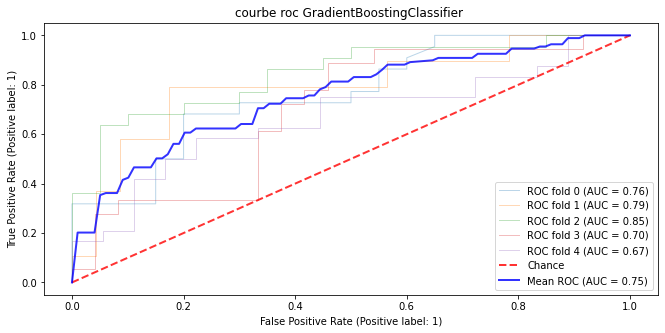

Accuracy: [0.69047619 0.76190476 0.73809524 0.64285714 0.64285714]
moy_accuracy: 0.70
precision_positive: [0.71428571 0.71428571 0.78947368 0.57142857 0.71428571]
moy_precision_positive: 0.70
sensibilité : [0.68181818 0.78947368 0.68181818 0.66666667 0.625     ]
moy_sensibilité: 0.69
spécificité : [0.7        0.73913043 0.8        0.625      0.66666667]
moy_spécificité: 0.71
MCC : [0.38138504 0.52620136 0.48346919 0.28867513 0.28867513]
MCC: 0.39
balanced_accuracy : [0.69090909 0.76430206 0.74090909 0.64583333 0.64583333]
balanced_accuracy: 0.70
roc_auc : [0.76477273 0.79176201 0.84545455 0.69675926 0.66666667]
roc_auc: 0.75
cohen_kappa_scorec : [0.38095238 0.52380952 0.4785553  0.28571429 0.28571429]
cohen_kappa_scorec: 0.39
VN : [14 17 16 15 12]
VP : [15 15 15 12 15]
FP : [6 6 4 9 6]
FN : [7 4 7 6 9]
precision_négative: [0.66666667 0.80952381 0.69565217 0.71428571 0.57142857]
moy_precision_négative: 0.69


In [14]:
classifiers = {
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 )}
def tp(y_true, y_pred): 
    value= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return value

my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
def VN(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,0]
    return value
my_scorer3 = make_scorer(VN, greater_is_better=True)
def VP(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[1,1]
    return value
my_scorer4 = make_scorer(VP, greater_is_better=True)
def FP(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,1]
    return value
my_scorer5 = make_scorer(FP, greater_is_better=True)
def FN(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[1,0]
    return value
my_scorer6 = make_scorer(FN, greater_is_better=True)
def precision_négative(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[1,0])
    return value
my_scorer7 = make_scorer(precision_négative, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe1, Y)):
         clf.fit( x_rfe1.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe1.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe1, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe1, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe1, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe1, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe1, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    scores8 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer3, cv=cv, n_jobs=-1)
    scores9 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer4, cv=cv, n_jobs=-1)
    scores10 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer5, cv=cv, n_jobs=-1)
    scores11= cross_val_score(clf, x_rfe1, Y, scoring=my_scorer6, cv=cv, n_jobs=-1)
    scores12= cross_val_score(clf, x_rfe1, Y, scoring=my_scorer7, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision_positive:',scores1)
    print('moy_precision_positive: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))
    print('VN :',scores8)
    print('VP :',scores9)
    print('FP :',scores10)
    print('FN :',scores11)
    print('precision_négative:',scores12)
    print('moy_precision_négative: %.2f' % mean(scores12))
